In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset = {"tempo":[1,3,4,4,6,8,10,10,11,13],
           "vendas":[91,110,106,116,119,129,139,143,138,159]}

dataset = pd.DataFrame(dataset)
dataset.head()

,tempo,vendas
0,1,91
1,3,110
2,4,106
3,4,116
4,6,119


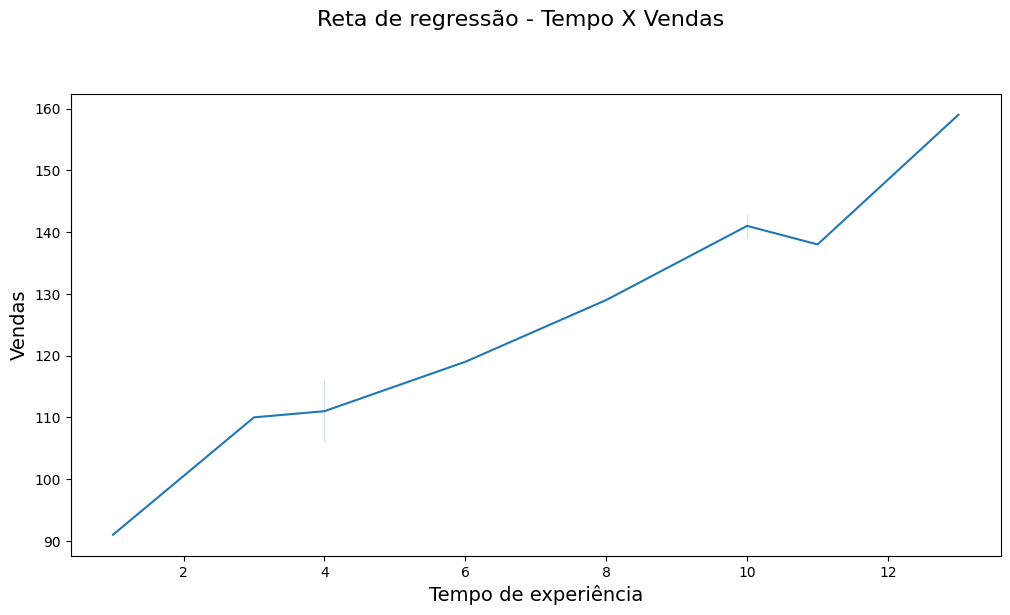

In [10]:
from pandas.io.sql import DatabaseError
ax = sns.lineplot(data=dataset, x='tempo', y='vendas')
ax.figure.set_size_inches(12,6)
ax.figure.suptitle('Reta de regressão - Tempo X Vendas', fontsize=16, y=1.02)
ax.set_xlabel('Tempo de experiência', fontsize=14)
ax.set_ylabel('Vendas', fontsize=14)
ax;

In [11]:
dataset.corr()

,tempo,vendas
tempo,1.000000,0.976883
vendas,0.976883,1.000000


In [13]:
import statsmodels.api as sm


In [14]:
y = dataset.vendas
x = sm.add_constant(dataset.tempo)

In [15]:
rr = sm.OLS(y,x).fit()

In [17]:
print(rr.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     167.1
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           1.22e-06
Time:                        15:12:40   Log-Likelihood:                -28.355
No. Observations:                  10   AIC:                             60.71
Df Residuals:                       8   BIC:                             61.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.0000      3.075     29.265      0.0

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [18]:
dataset['y_previsto'] = rr.predict()
dataset.head()

,tempo,vendas,y_previsto
0,1,91,95.0
1,3,110,105.0
2,4,106,110.0
3,4,116,110.0
4,6,119,120.0


In [20]:
dataset['erro'] = dataset['y_previsto'] - dataset['vendas']
dataset.head()

,tempo,vendas,y_previsto,erro
0,1,91,95.0,4.0
1,3,110,105.0,-5.0
2,4,106,110.0,4.0
3,4,116,110.0,-6.0
4,6,119,120.0,1.0
